<h2>1. Thêm Thư Viện <h2>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the Dataset
df = pd.read_csv(r"/content/drive/MyDrive/DW_Final/preprocessed_data1.csv")

# Head
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.207370,-0.803648,-0.211993,0.286163,1.0,1,1,0,0,0,1
1,1,1,0,0,-0.126765,0.010112,-0.211993,0.286163,1.0,0,0,1,0,0,0
2,1,1,0,1,-0.544566,-0.803648,-1.023912,0.286163,1.0,1,1,0,0,0,1
3,1,1,1,0,-0.654625,0.468797,-0.316757,0.286163,1.0,1,1,0,0,0,1
4,1,0,0,0,0.247223,-0.803648,-0.041752,0.286163,1.0,1,1,0,0,0,1


<h3>Thông tin tóm tắt dataframe</h3>

In [ ]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.218241,0.133550,5.786179e-18,-4.628943e-17,2.025163e-17,5.120768e-16,0.855049,0.687296,0.586319,0.166124,0.164495,0.379479,0.328990
std,0.386497,0.476373,0.413389,0.340446,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.352339,0.463973,0.492894,0.372495,0.371027,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,-1.296766e+00,-8.036485e-01,-1.770354e+00,-2.885391e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,-5.768976e-01,-8.036485e-01,-5.753925e-01,2.861630e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,-3.301232e-01,-1.622991e-01,-2.119931e-01,2.861630e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.931175e-01,4.360148e-01,2.692655e-01,2.861630e-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,4.028175e+00,4.298816e+00,4.201836e+00,2.189095e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    float64
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Dependents_0             614 non-null    int64  
 11  Dependents_1             614 non-null    int64  
 12  Dependents_2             614 non-null    int64  
 13  Property_Area_Semiurban  614 non-null    int64  
 14  Property_Area_Urban      6

<h2>2. Mô tả thông tin </h2>

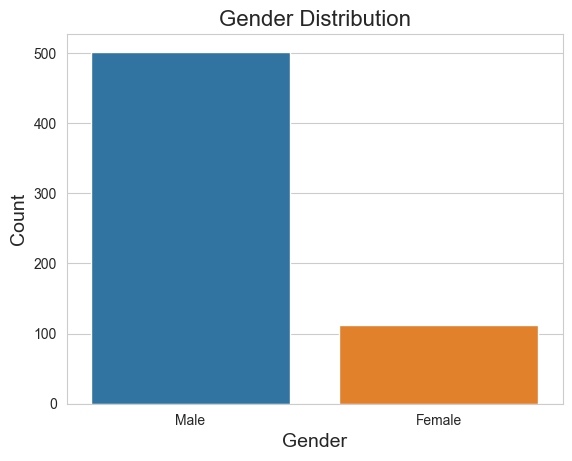

In [ ]:

sns.set_style('whitegrid')
sns.countplot(data=df, x='Gender', palette=['#1f77b4', '#ff7f0e'])
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

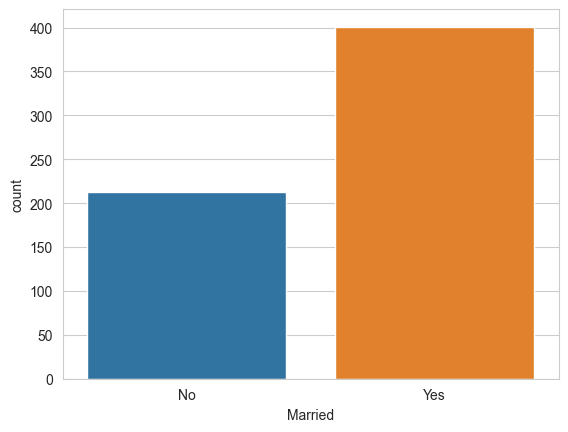

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='Married', palette=['#1f77b4', '#ff7f0e'])
plt.show()

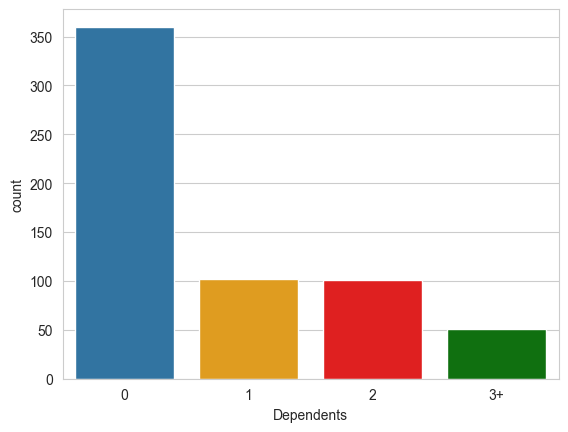

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='Dependents', palette=['#1f77b4', 'orange','red','green'])
plt.show()

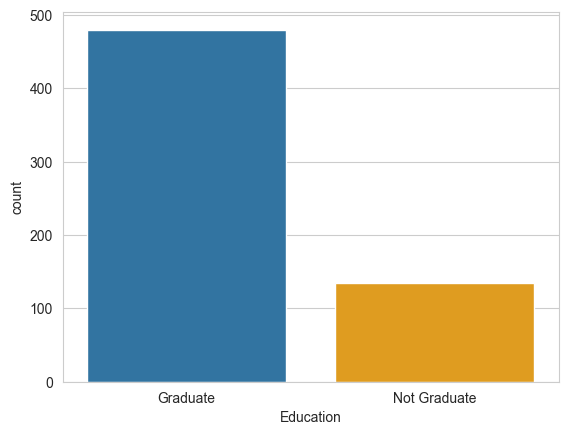

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=df, x='Education', palette=['#1f77b4', 'orange'])
plt.show()

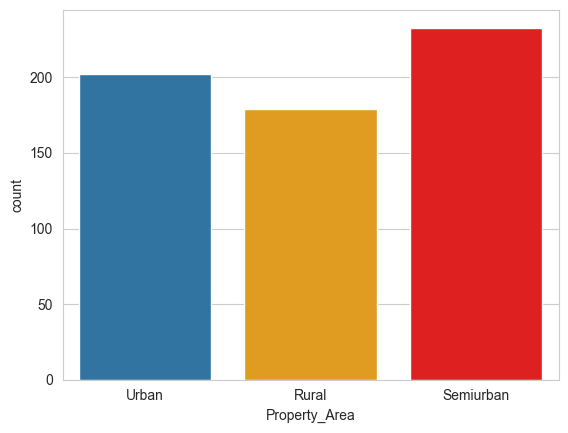

In [ ]:

sns.set_style('whitegrid')
sns.countplot(data=df, x='Property_Area', palette=['#1f77b4', 'orange','red'])
plt.show()

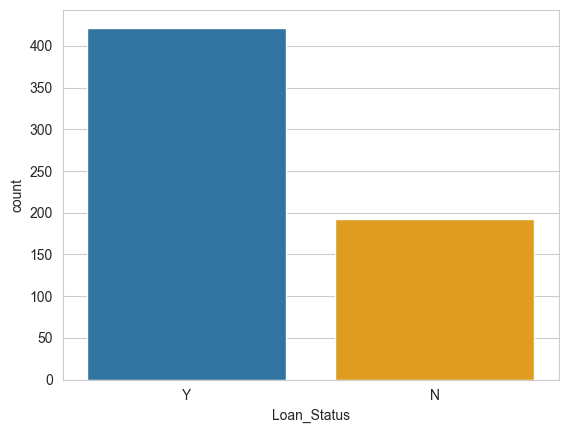

In [ ]:

sns.set_style('whitegrid')
sns.countplot(data=df, x='Loan_Status', palette=['#1f77b4', 'orange'])
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

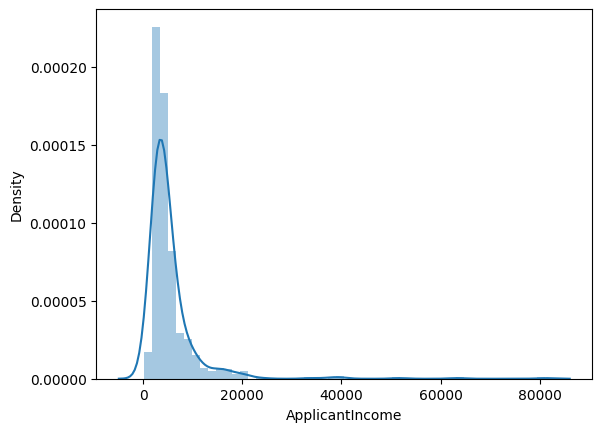

In [ ]:
sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

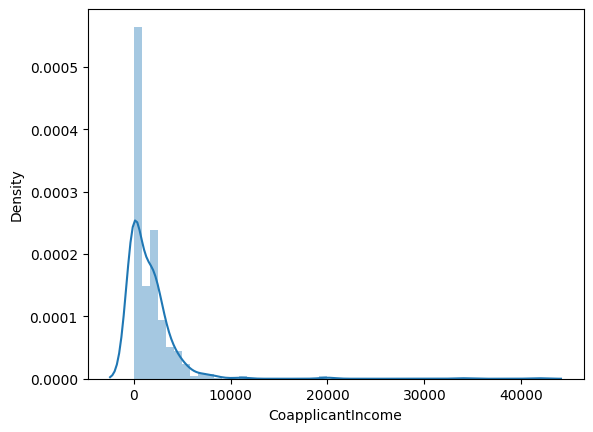

In [ ]:
sns.distplot(df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

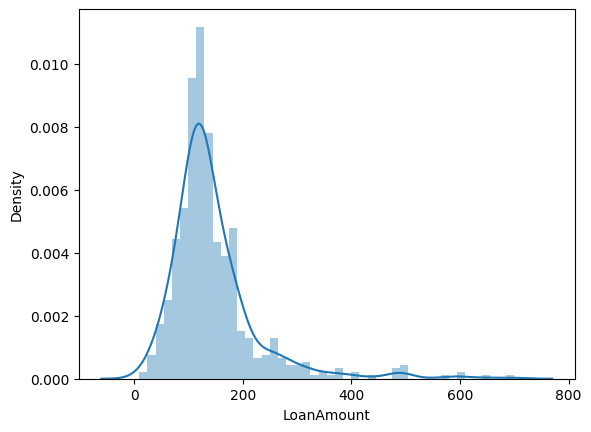

In [ ]:
sns.distplot(df["LoanAmount"])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

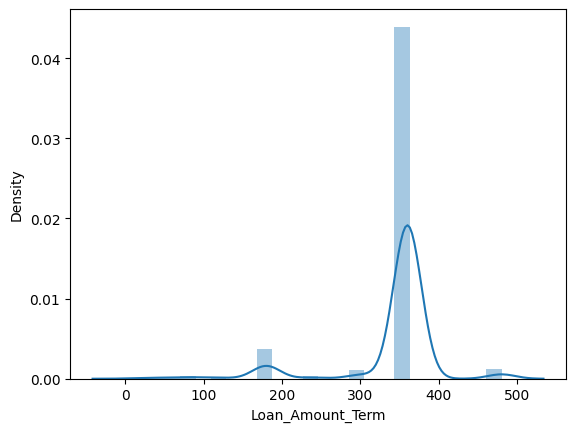

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

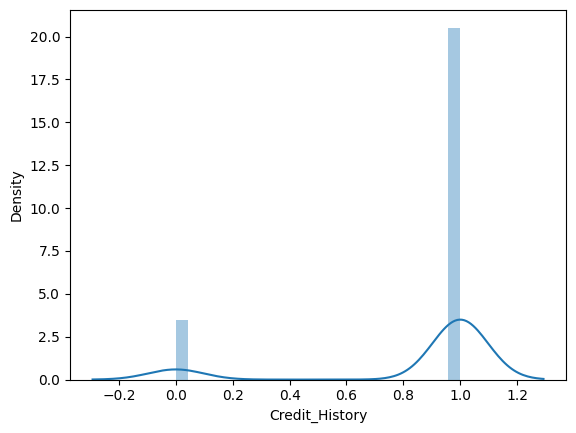

In [ ]:
sns.distplot(df['Credit_History'])

<h2>3. Đến bước chia file Train và Test </h2>

In [ ]:
# Vứt đi cột LoanID vì không sử dụng được
#data_cleaned = df.drop(columns=['Loan_ID'])

# Mã hóa lại các nhãn

#label_enc = LabelEncoder()
#for col in data_cleaned.select_dtypes(include='object').columns:
    #data_cleaned[col] = label_enc.fit_transform(data_cleaned[col])

# Chia đặc trung X và nhãn Y
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

X.head(), y.head()


(   Gender  Married  Education  Self_Employed  ApplicantIncome  \
 0       1        0          0              0         0.207370   
 1       1        1          0              0        -0.126765   
 2       1        1          0              1        -0.544566   
 3       1        1          1              0        -0.654625   
 4       1        0          0              0         0.247223   
 
    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
 0          -0.803648   -0.211993          0.286163             1.0   
 1           0.010112   -0.211993          0.286163             1.0   
 2          -0.803648   -1.023912          0.286163             1.0   
 3           0.468797   -0.316757          0.286163             1.0   
 4          -0.803648   -0.041752          0.286163             1.0   
 
    Dependents_0  Dependents_1  Dependents_2  Property_Area_Semiurban  \
 0             1             0             0                        0   
 1             0            

<h4>=>>> Đã loại cột Loan ID<h4>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<h2>4. Xây dựng mô hình </h2>

In [ ]:
# Classify function
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    model.fit(x_train, y_train)

    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

<h3>Decision tree </h3>

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 68.83116883116884
Cross validation is 70.68639210982273


<h3>Random forest </h3>

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
classify(rf_model, X, y)

Accuracy is 76.62337662337663
Cross validation is 78.17273090763695


<h3>Extra Tree</h3>

In [ ]:
# Extra Trees Classifier
et_model = ExtraTreesClassifier()
classify(et_model, X, y)

Accuracy is 75.32467532467533
Cross validation is 75.24057043849126


In [ ]:
print("Decision Tree Accuracy:", model.score(x_test, y_test) * 100)
print("Random Forest Accuracy:", rf_model.score(x_test, y_test) * 100)
print("Extra Trees Accuracy:", et_model.score(x_test, y_test) * 100)

Decision Tree Accuracy: 68.83116883116884
Random Forest Accuracy: 76.62337662337663
Extra Trees Accuracy: 75.32467532467533


<h3>Trực quan hóa Decision Tree</h3>

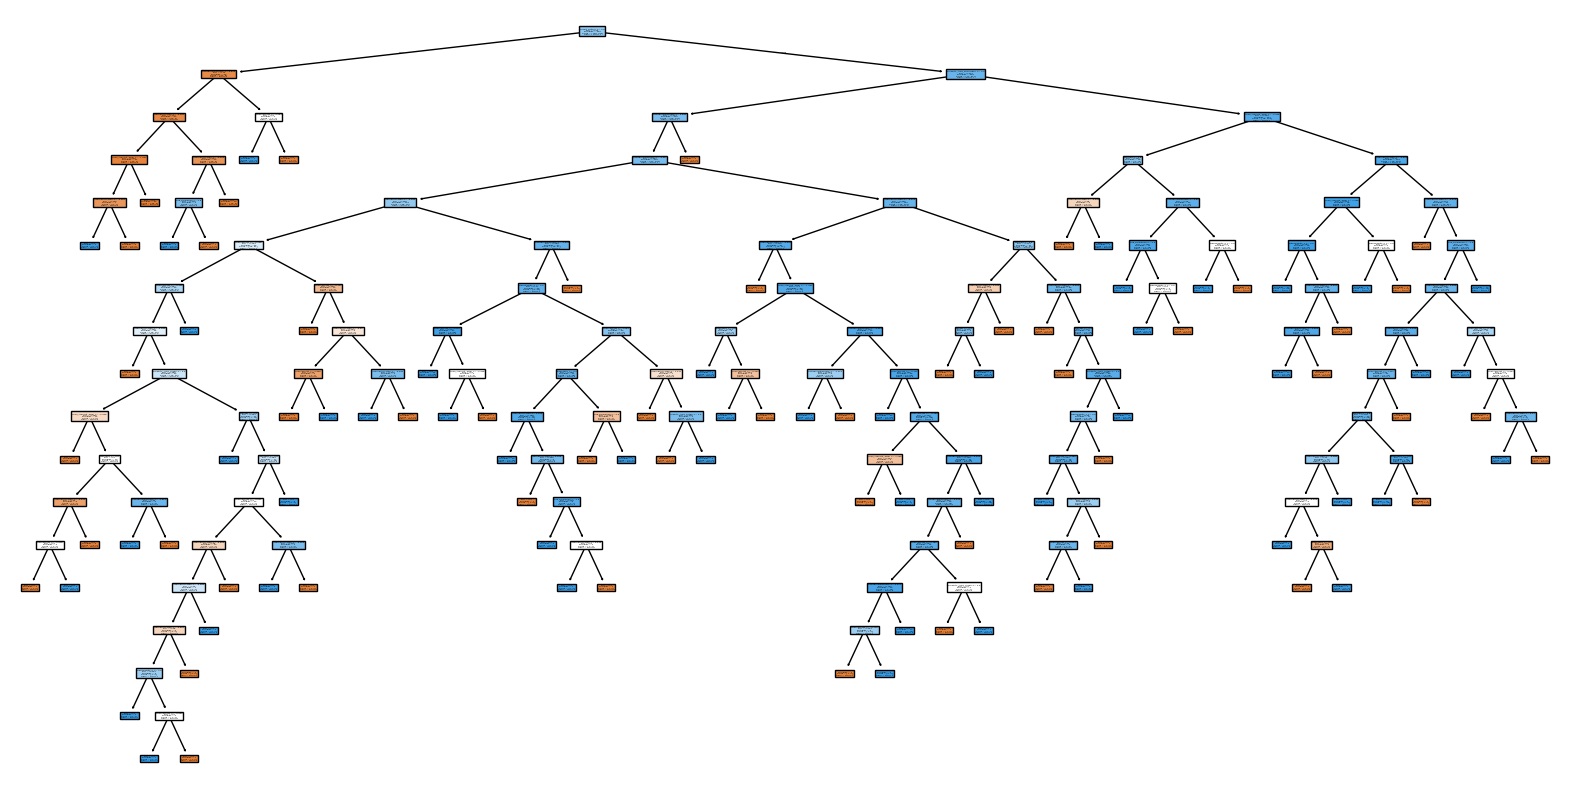

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=['Class 0', 'Class 1'],
          filled=True)
plt.show()


<h3>Trực quan hóa Random forest</h3>

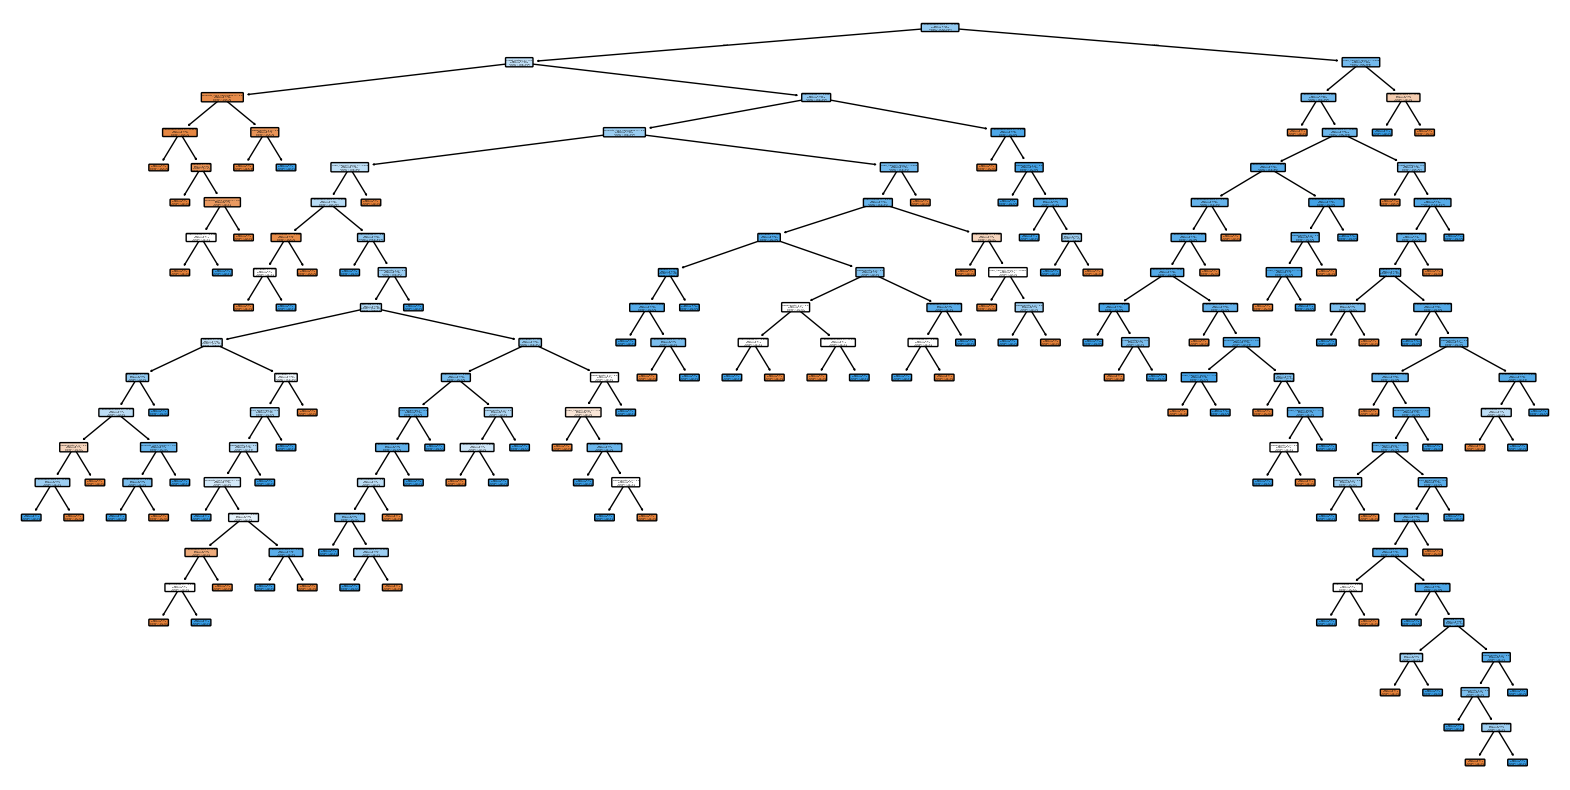

In [ ]:
# Vẽ cây đầu tiên trong Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=x_train.columns,
          class_names=['Class 0', 'Class 1'],
          filled=True,
          rounded=True)
plt.show()


<h3>Trực quan hóa Extra Tree</h3>

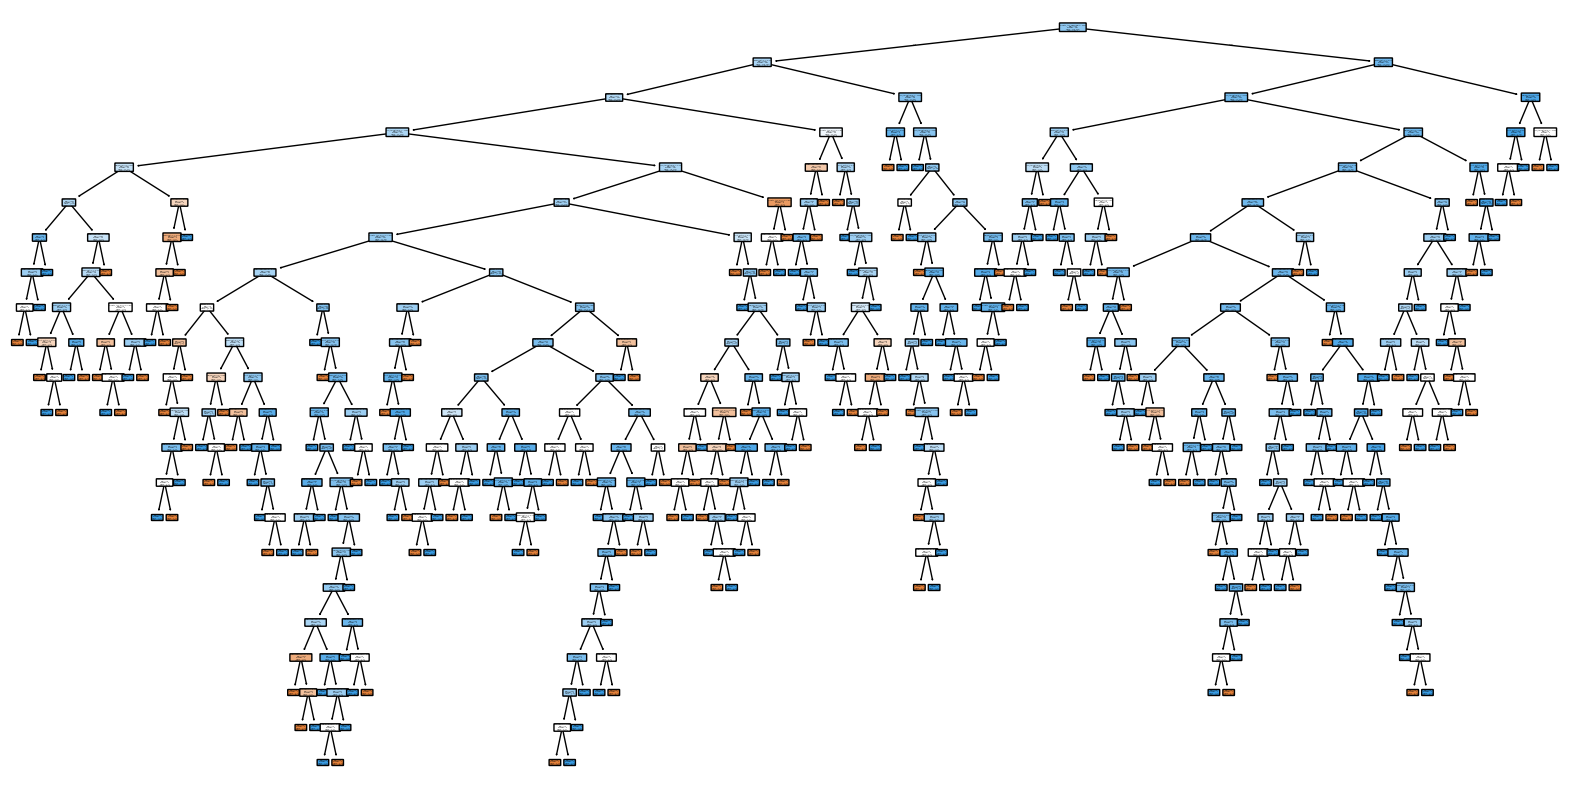

In [ ]:
# Vẽ cây đầu tiên trong Extra Trees
plt.figure(figsize=(20, 10))
plot_tree(et_model.estimators_[0],
          feature_names=x_train.columns,
          class_names=['Class 0', 'Class 1'],
          filled=True,
          rounded=True)
plt.show()


<h2>5. Đánh giá mô hình</h2>

<h3>Confusion Matrix </h3>

=== Decision Tree - Classification Report ===
              precision    recall  f1-score   support

           0       0.57      0.48      0.52        54
           1       0.74      0.80      0.77       100

    accuracy                           0.69       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154

=== Decision Tree - Confusion Matrix ===


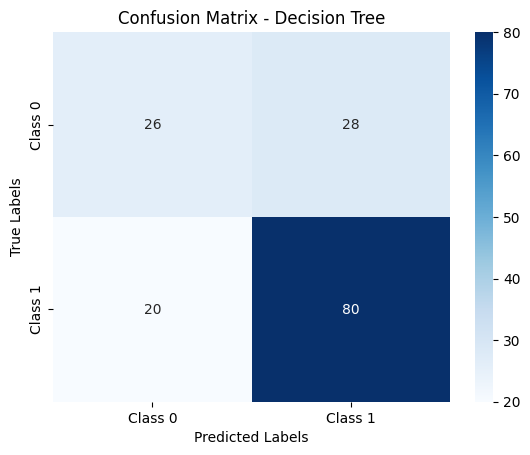

=== Random Forest - Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.41      0.55        54
           1       0.75      0.96      0.84       100

    accuracy                           0.77       154
   macro avg       0.80      0.68      0.70       154
weighted avg       0.78      0.77      0.74       154

=== Extra Trees - Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.44      0.56        54
           1       0.75      0.92      0.83       100

    accuracy                           0.75       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.75      0.75      0.73       154

=== Random Forest - Confusion Matrix ===


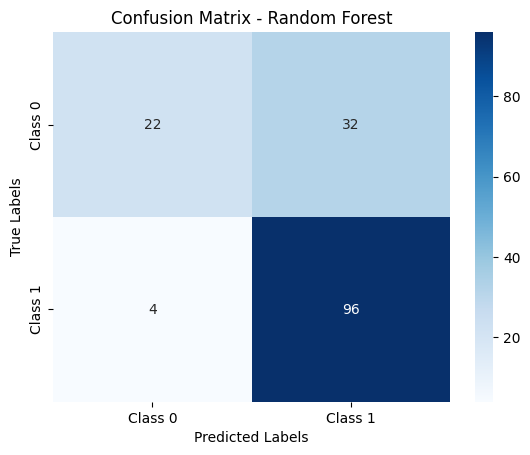

=== Extra Trees - Confusion Matrix ===


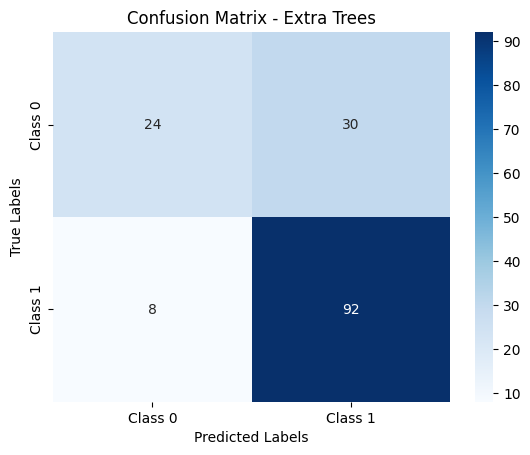

In [ ]:
# Hàm dự đoán nhãn
def predict_labels(model, x_test):
    return model.predict(x_test)

# Hàm tạo báo cáo chi tiết
def generate_classification_report(y_test, y_pred, model_name):
    print(f"=== {model_name} - Classification Report ===")
    print(classification_report(y_test, y_pred))

# Hàm tạo confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    print(f"=== {model_name} - Confusion Matrix ===")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Thực thi từng hàm cho Decision Tree
y_pred_dt = predict_labels(model, x_test)
generate_classification_report(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Dự đoán nhãn cho Random Forest và Extra Trees
y_pred_rf = predict_labels(rf_model, x_test)
y_pred_et = predict_labels(et_model, x_test)

# Tạo báo cáo chi tiết cho Random Forest và Extra Trees
generate_classification_report(y_test, y_pred_rf, "Random Forest")
generate_classification_report(y_test, y_pred_et, "Extra Trees")

# Ma trận nhầm lẫn cho Random Forest và Extra Trees
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_et, "Extra Trees")





<h3> ROC và AUC </h3>

Decision Tree - AUC Score: 0.64
Random Forest - AUC Score: 0.80
Extra Trees - AUC Score: 0.76


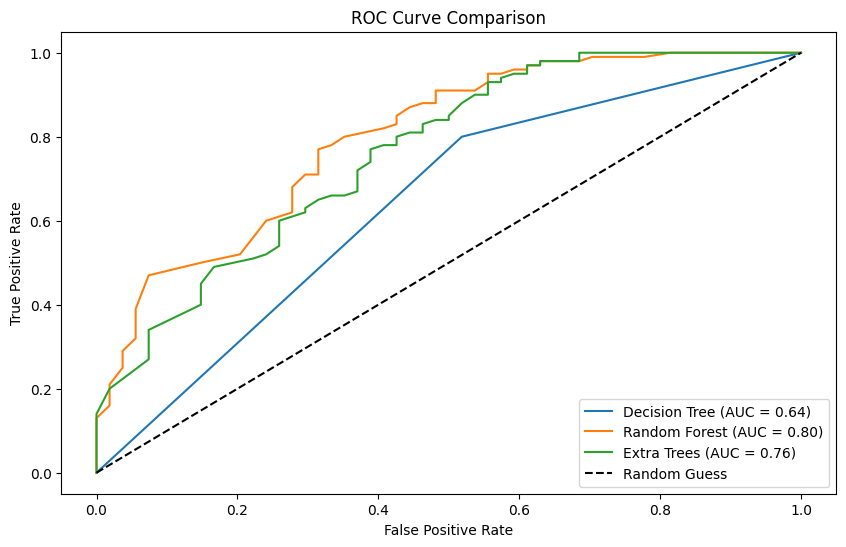

In [ ]:
#Hàm tính và vẽ ROC & AUC
def plot_roc_auc(model, x_test, y_test, model_name):
    if hasattr(model, "predict_proba"):  # Kiểm tra nếu mô hình hỗ trợ xác suất
        y_prob = model.predict_proba(x_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")
        print(f"{model_name} - AUC Score: {auc_score:.2f}")
    else:
        print(f"{model_name} does not support predict_proba. Skipping ROC Curve.")


plt.figure(figsize=(10, 6))
plot_roc_auc(model, x_test, y_test, "Decision Tree")
plot_roc_auc(rf_model, x_test, y_test, "Random Forest")
plot_roc_auc(et_model, x_test, y_test, "Extra Trees")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

**Random Forest** là mô hình mạnh nhất trong ba mô hình này, với AUC 0.80, cho thấy khả năng phân biệt tốt giữa các lớp.

**Extra Trees** cũng là một mô hình tốt với AUC 0.76, nhưng có phần kém hơn Random Forest một chút.

**Decision Tree** mặc dù có AUC thấp hơn (0.64), nhưng vẫn có thể hữu ích cho các bài toán đơn giản hoặc trong các trường hợp cần tốc độ dự đoán nhanh.